In [2]:
!pip install gensim

  Running setup.py bdist_wheel for gensim: started
  Running setup.py bdist_wheel for gensim: finished with status 'done'
  Stored in directory: C:\Users\msdaw\AppData\Local\pip\Cache\wheels\2a\12\79\a26b1d566ac0edbcc806689fdf4f813ff4aaa5b5cf6e37406b
  Running setup.py bdist_wheel for smart-open: started
  Running setup.py bdist_wheel for smart-open: finished with status 'done'
  Stored in directory: C:\Users\msdaw\AppData\Local\pip\Cache\wheels\6a\d2\01\eba912a84fcac622bd25682b0d82933702f5324559e9e62a69
  Running setup.py bdist_wheel for bz2file: started
  Running setup.py bdist_wheel for bz2file: finished with status 'done'
  Stored in directory: C:\Users\msdaw\AppData\Local\pip\Cache\wheels\81\75\d6\e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built gensim smart-open bz2file


In [3]:
!pip install codecs

  Could not find a version that satisfies the requirement codecs (from versions: )
No matching distribution found for codecs


In [4]:
!pip install itertools

  Could not find a version that satisfies the requirement itertools (from versions: )
No matching distribution found for itertools


In [5]:
import gensim
import nltk
import sklearn
import pandas as pd
import numpy as np
import matplotlib

import re
import codecs
import itertools
import matplotlib.pyplot as plt

print ('DONE [IMPORT NECESSARY LIBRARIES]')

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


DONE [IMPORT NECESSARY LIBRARIES]


In [9]:
input_file = codecs.open("datasets/socialmedia_relevant_cols.csv", "r",encoding='utf-8', errors='replace')

questions = pd.read_csv(input_file)

#let's give names to the columns of our dataframe
questions.columns=['text', 'choose_one', 'class_label']

print ('DONE - [ETL] Import Data')

DONE - [ETL] Import Data


In [10]:
questions.head()

,text,choose_one,class_label
0,Just happened a terrible car crash,Relevant,1
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1
2,"Heard about #earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,Forest fire near La Ronge Sask. Canada,Relevant,1


In [11]:
pd.crosstab(questions['choose_one'],questions['class_label'])

class_label,0,1,2
choose_one,,,
Can't Decide,0,0,16
Not Relevant,6187,0,0
Relevant,0,4673,0


## Converting all the text in lower case & then removing all the unnecessary links

In [12]:
def standardize_text(df,text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"http\S+", "", elem))  
    return df

clean_questions = standardize_text(questions, "text")
print ('DONE - [PREPROCESS] Text Cleaning')

DONE - [PREPROCESS] Text Cleaning


In [13]:
clean_questions.head()

,text,choose_one,class_label
0,just happened a terrible car crash,Relevant,1
1,our deeds are the reason of this #earthquake m...,Relevant,1
2,"heard about #earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,forest fire near la ronge sask. canada,Relevant,1


In [14]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

clean_questions["tokens"] = clean_questions["text"].apply(tokenizer.tokenize)
clean_questions.head()

,text,choose_one,class_label,tokens
0,just happened a terrible car crash,Relevant,1,"[just, happened, a, terrible, car, crash]"
1,our deeds are the reason of this #earthquake m...,Relevant,1,"[our, deeds, are, the, reason, of, this, earth..."
2,"heard about #earthquake is different cities, s...",Relevant,1,"[heard, about, earthquake, is, different, citi..."
3,"there is a forest fire at spot pond, geese are...",Relevant,1,"[there, is, a, forest, fire, at, spot, pond, g..."
4,forest fire near la ronge sask. canada,Relevant,1,"[forest, fire, near, la, ronge, sask, canada]"


In [15]:
## [EDA] Explore words and sentences

all_words = [word for tokens in clean_questions["tokens"] for word in tokens]

sentence_lengths = [len(tokens) for tokens in clean_questions["tokens"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

158663 words total, with a vocabulary size of 21327


In [16]:
# What are the words in the vocabulary
print (VOCAB[0:100])

# What are the most commonly occuring words
from collections import Counter
count_all_words = Counter(all_words)

# get the top 100 most common occuring words
count_all_words.most_common(100)

['0', '00', '000', '0000', '00am', '00end', '00pm', '01', '02', '0215', '02pm', '03', '030', '032', '033', '034', '039', '04', '05', '0518', '05th', '06', '060', '061', '06jst', '07', '08', '0840728', '0853', '087809233445', '0880', '09', '0992', '0l', '0npzp', '1', '10', '100', '1000', '10000', '100000', '1000s', '1008pla', '1008planet', '100mb', '100nd', '100s', '101', '1017', '1023', '1028', '103', '105', '106', '1061thetwister', '107', '109', '10am', '10k', '10km', '10m', '10news', '10pm', '10th', '10w', '10x', '11', '11000', '11000000', '111020', '1115', '11211', '114', '1141', '1145', '1148', '115', '115film', '1179', '118', '119', '119000', '11am', '11th', '12', '120', '1200', '12000', '120000', '1200000', '120v', '1233newcastle', '1236', '124', '1245z', '125', '126', '129', '12am', '12hr']


[('the', 4621),
 ('a', 3109),
 ('to', 2837),
 ('in', 2808),
 ('of', 2610),
 ('i', 2511),
 ('and', 2023),
 ('s', 1403),
 ('is', 1392),
 ('you', 1287),
 ('for', 1245),
 ('on', 1238),
 ('it', 1141),
 ('my', 976),
 ('that', 853),
 ('with', 797),
 ('by', 777),
 ('at', 748),
 ('t', 723),
 ('this', 705),
 ('from', 614),
 ('are', 600),
 ('be', 596),
 ('was', 553),
 ('_', 535),
 ('have', 513),
 ('amp', 510),
 ('like', 493),
 ('as', 485),
 ('up', 471),
 ('just', 459),
 ('we', 449),
 ('me', 445),
 ('m', 439),
 ('but', 436),
 ('so', 432),
 ('not', 431),
 ('your', 429),
 ('out', 412),
 ('no', 401),
 ('all', 381),
 ('will', 372),
 ('after', 370),
 ('fire', 367),
 ('when', 365),
 ('can', 362),
 ('an', 358),
 ('if', 353),
 ('he', 351),
 ('has', 341),
 ('get', 336),
 ('new', 329),
 ('they', 327),
 ('more', 325),
 ('via', 325),
 ('about', 312),
 ('what', 311),
 ('2', 311),
 ('now', 309),
 ('or', 294),
 ('how', 293),
 ('news', 289),
 ('people', 285),
 ('one', 283),
 ('who', 271),
 ('there', 266),
 ('over

In [17]:
## MANDATORY 
## [CLASSIFY] Train test Split

from sklearn.model_selection import train_test_split

list_corpus = clean_questions["text"]
list_labels = clean_questions["class_label"]

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)

print("Training set: %d samples" % len(X_train))
print("Test set: %d samples" % len(X_test))

Training set: 8700 samples
Test set: 2176 samples


In [18]:
print (X_train[:10])

2354      ��@thehighfessions: 'my friend came to school...
9734     dtn india: rly tragedy in mp: some live to rec...
9332     @ddnewslive @nitishkumar  and @arvindkejriwal ...
10831    three days off from work and they've pretty mu...
3125     malaysian officials say debris found on reunio...
9836     @arobotlegion so be it. you can't tell an oppr...
302                                  annihilated abs . ?? 
9872     america like south africa is a traumatised sic...
4638     get emergency edmonton locksmith services  in ...
9309     3 things all affiliate marketers need to survi...
Name: text, dtype: object


In [19]:
print (y_train[:10])

2354     0
9734     1
9332     0
10831    0
3125     1
9836     0
302      1
9872     0
4638     0
9309     0
Name: class_label, dtype: int64


# Embedding
## 1. bag-of-Words count

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\w+')
bow = dict()
bow["train"] = (count_vectorizer.fit_transform(X_train), y_train)
bow["test"]  = (count_vectorizer.transform(X_test), y_test)
print(bow["train"][0].shape)
print(bow["test"][0].shape)

(8700, 18738)
(2176, 18738)


## 2. TF-IDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w+')

tfidf = dict()
tfidf["train"] = (tfidf_vectorizer.fit_transform(X_train), y_train)
tfidf["test"]  = (tfidf_vectorizer.transform(X_test), y_test)

print(tfidf["train"][0].shape)
print(tfidf["test"][0].shape)

(8700, 18738)
(2176, 18738)


## 3. Word2Vec - Capturing semantic meaning

In [23]:
#word2vec_path = "../input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin"
#word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

print ('DONE [Load Word2Vec Pretrained Corpus]')

DONE [Load Word2Vec Pretrained Corpus]


# The Classifiers
## 1. Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_classifier = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)

print ('DONE - [CLASSIFY] Initialize Logistic Regression')

DONE - [CLASSIFY] Initialize Logistic Regression


In [25]:
## [EVALUATE] Prepare Metrics

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

print ('DONE - [EVALUATE] Prepare Metrics')

DONE - [EVALUATE] Prepare Metrics


In [26]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

print ('DONE - [EVALUATE] Confusion Matrix')

DONE - [EVALUATE] Confusion Matrix


## 2. Linear Support Vector Machine classifier

In [27]:
from sklearn.svm import LinearSVC

lsvm_classifier = LinearSVC(C=1.0, class_weight='balanced', multi_class='ovr', random_state=40)

print ('[CLASSIFY] Initialize Support Vector Machine Classifier')

[CLASSIFY] Initialize Support Vector Machine Classifier


## 3. Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

print ('DONE - [CLASSIFY] Initialize Naive Bayes')

DONE - [CLASSIFY] Initialize Naive Bayes


## 4. Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)

print ('DONE - [CLASSIFY] Initialize Decision Tree')

DONE - [CLASSIFY] Initialize Decision Tree


In [30]:
embedding = bow                  # bow | tfidf | w2v

print ('DONE - [EMBEDDING] CHOOSE EMBEDDING')

DONE - [EMBEDDING] CHOOSE EMBEDDING


### LogisticRegression with Bag-of-words

In [34]:
lr_classifier.fit(*embedding['train'])
y_pred = lr_classifier.predict(embedding["test"][0])

accuracy, precision, recall, f1 = get_metrics(embedding["test"][1], y_pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.765, precision = 0.763, recall = 0.765, f1 = 0.763


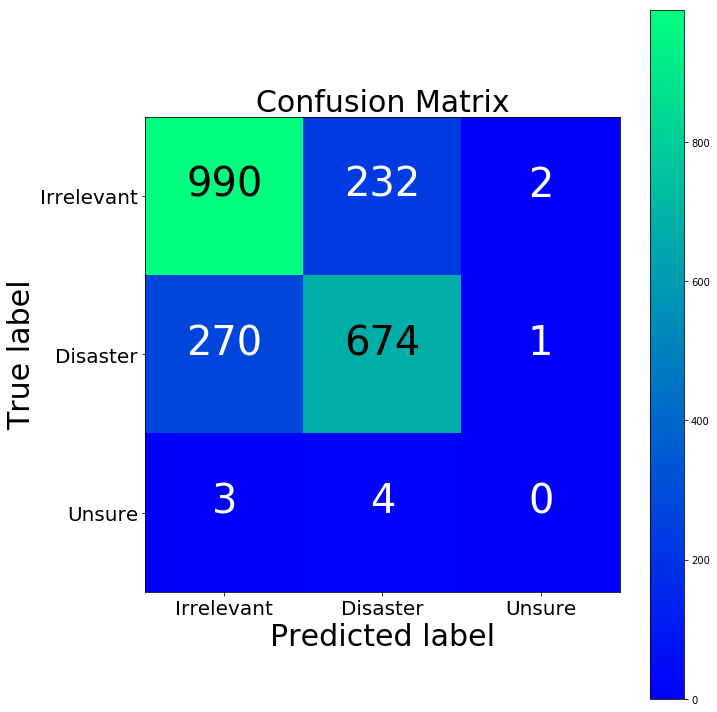

In [35]:
cm = confusion_matrix(embedding["test"][1], y_pred)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Irrelevant','Disaster', 'Unsure'], normalize=False, title='Confusion Matrix')
plt.show()

### LogisticRegression with TfIdf

In [36]:
lr_classifier.fit(*tfidf['train'])
y_pred = lr_classifier.predict(tfidf["test"][0])

accuracy, precision, recall, f1 = get_metrics(embedding["test"][1], y_pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.763, precision = 0.761, recall = 0.763, f1 = 0.762


C:\Users\msdaw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\msdaw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### LogisticRegression with GridSearchCV

In [44]:
param_grid = {
    'C':[0.001,0.01,1,10,100,1000],
    'class_weight':['balanced'],
    'solver':['newton-cg'],
    'multi_class':['multinomial']
}

logreg = LogisticRegression(random_state=40)

grid = GridSearchCV(logreg,param_grid=param_grid,cv=5,n_jobs=-1)
grid.fit(*embedding['train'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=40, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 1, 10, 100, 1000], 'class_weight': ['balanced'], 'solver': ['newton-cg'], 'multi_class': ['multinomial']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
grid.best_params_

{'C': 1,
 'class_weight': 'balanced',
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [46]:
grid.best_score_

0.7967816091954023

In [47]:
y_pred = grid.best_estimator_.predict(embedding["test"][0])

accuracy, precision, recall, f1 = get_metrics(embedding["test"][1], y_pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.777, precision = 0.775, recall = 0.777, f1 = 0.775


In [48]:
logreg = LogisticRegression(random_state=40)
param_grid = {
    'C':[0.001,0.01,1,10,100,1000],
    'class_weight':['balanced'],
    'solver':['newton-cg'],
    'multi_class':['multinomial']
}

grid = GridSearchCV(logreg,param_grid=param_grid,cv=5,n_jobs=-1)
grid.fit(*tfidf['train'])

grid.best_params_

{'C': 1,
 'class_weight': 'balanced',
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [49]:
grid.best_score_

0.7983908045977012

In [50]:
y_pred = grid.best_estimator_.predict(tfidf["test"][0])

accuracy, precision, recall, f1 = get_metrics(tfidf["test"][1], y_pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.788, precision = 0.785, recall = 0.788, f1 = 0.786


C:\Users\msdaw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\msdaw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
